## Название проекта - Принятие решений в бизнесе


## Описание проекта - Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Цель проекта
- Выставить приоритет в имеющихся гипотезах,
- Проанализируйте A/B-тест, построить все необходимые графики для необходимого анализа


## Часть 1 -  Общая информация

###  Данные для первой части (Гипотезы)

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
import scipy.stats as stats
pd.options.display.max_colwidth = 100

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis = hypothesis.rename(
    columns = {'Hypothesis' : 'hypothesis', 'Reach' : 'reach', 'Impact':'impact', 'Confidence' : 'confidence',
                                  'Efforts':'efforts'})

### Данные для второй части (orders)

In [5]:
orders = pd.read_csv('/datasets/orders.csv')

In [6]:
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Поиск проспусков

In [10]:
display(orders.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [12]:
orders.groupby('group')['visitorId'].count()

group
A    557
B    640
Name: visitorId, dtype: int64

In [13]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [14]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Дубликаты

In [15]:
display(orders.duplicated().sum())

0

Исправление написания

In [16]:
orders = orders.rename(
    columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

### Данные для второй части (visitors)

In [17]:
visits = pd.read_csv('/datasets/visitors.csv')

In [18]:
display(visits.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проспуски

In [21]:
display(visits.isna().sum())

date        0
group       0
visitors    0
dtype: int64

Дубликаты

In [22]:
display(visits.duplicated().sum())

0

In [23]:
visits['group'].unique()

array(['A', 'B'], dtype=object)

In [24]:
visits['date'].min()

Timestamp('2019-08-01 00:00:00')

In [25]:
visits['date'].max()

Timestamp('2019-08-31 00:00:00')

#### Вывод - в таблице orders исправлен формат времени, дубликатов и пропусков нет,так же испрвил шрифт написания колонок, в таблице visits теже сиправления, дубликатов и пропусков в таблице нет. 

In [26]:
orders1 = orders.groupby('visitor_id')['group'].nunique()[orders.groupby('visitor_id')['group'].nunique()>1]
orders1.head()

visitor_id
8300375      2
199603092    2
232979603    2
237748145    2
276558944    2
Name: group, dtype: int64

## Часть 2. Приоритизация гипотез.

 ### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [30]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [31]:
data1 = hypothesis[['hypothesis', 'rice']]

In [32]:
display(data1.sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод - по подсчитанным данным в колонке RICE видно ,что самой перспективной идей является - № 7Добавить форму подписки на все основные страни..., №2 Добавить блоки рекомендаций товаров на сайт ин..., №0- Добавить два новых канала привлечения трафика,... и №6 - Показать на главной странице баннеры с актуаль...

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [33]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] /hypothesis['efforts']

In [34]:
data2 = hypothesis[['hypothesis', 'ice']].copy()
data2['ice'] = data2['ice'].apply(lambda x: float("{:.2f}".format(x)))

In [35]:
display((data2.sort_values(by='ice', ascending = False)))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [36]:
data2 = data2.merge(data1, on='hypothesis')
data2

,hypothesis,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Вывод - по подсчитанным данным в колонке ICE видно ,что самой перспективной идей является - № 8Запустить акцию, дающую скидку на товар в день..., №0 Добавить два новых канала привлечения трафика,..., №7- Добавить форму подписки на все основные страни... и №6 - Показать на главной странице баннеры с актуаль...

### Вывод - разница между методами видна в приоритизации методов, а  появляется она изза элемента reach в формуле RICE, reach - показатель охвата пользователей, и формула RICE дает более точные показатели по ориентированию по методам.

## Часть 3. Анализ A/B-теста

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [37]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [38]:
datesGroups = orders[['date','group']].drop_duplicates()

In [39]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [40]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], 
                                                                         visits['group'] == x['group']
                                                                         )].agg({'date' : 'max', 'group' : 'max',
                                                                                 'visitors' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [41]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

Вывод таблицы кумулятивной вырочкой по группам

In [42]:
display(cumulativeData.head(5))

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [43]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [44]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

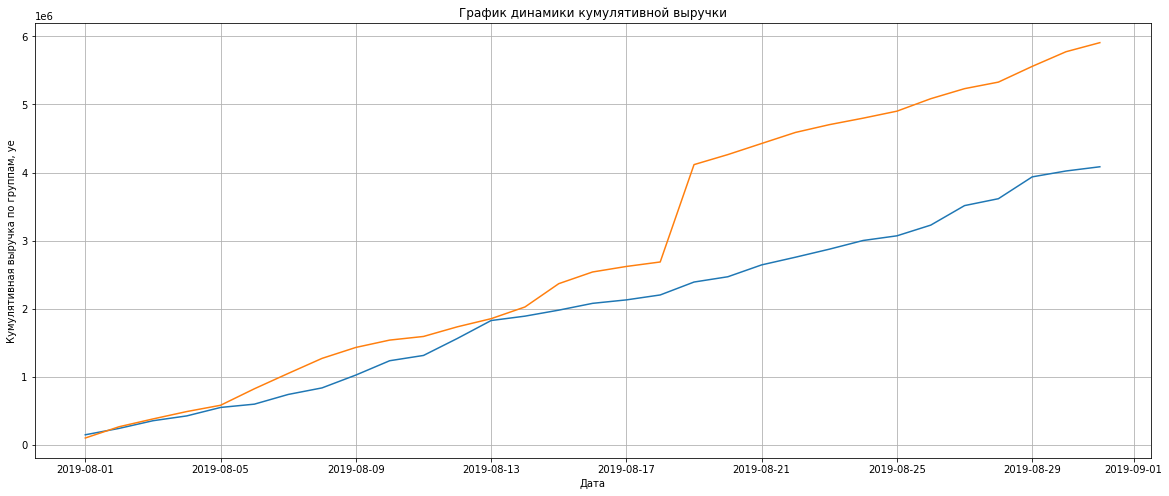

In [45]:
plt.figure(figsize=(20, 8))
# Строим график выручки группы A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='график выручки группы А')
# Строим график выручки группы B
plt.plot( cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label='график выручки группы B')
plt.grid()
plt.ylabel('Кумулятивная выручка по группам, уе')
plt.xlabel('Дата')
plt.title('График динамики кумулятивной выручки')
plt.show() 

#### Выводы и педложения - выручка по группе А и В ранвомерно растет , имеются резкие скачки в группе В, возможно изза большого заказа или большое количество заказов 17 августа 2019 года, что то в этот день произошло, дальше вырчука по группе В в разы больше группы А.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

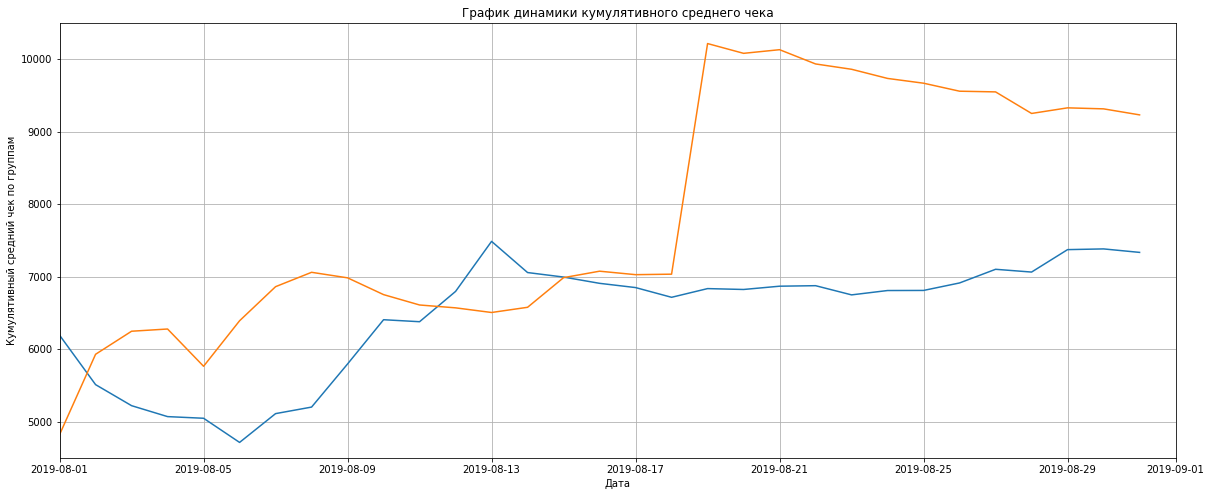

In [46]:
plt.figure(figsize=(20, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.title('График динамики кумулятивного среднего чека')
plt.grid()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 4500, 10500])
plt.show()

#### Выводы и педложения - по групе А средний чек с начало момента анализа примерно неделю виден спад и через неделю начинается подъем недельный и после небольшого спада остается примерно на одном уровне, а вот по группе В видно увеличение среднего чека волнообразно до 17-18 августа 19 года  виден резкий рост чека и после спад, чтобы не сделали 17-18 августа я думаю стоит продолжать в том же духе.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

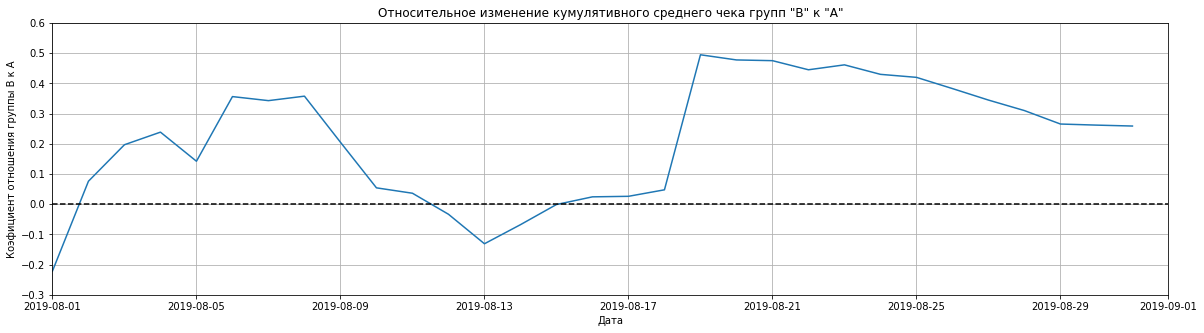

In [47]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',
                                                   suffixes=['A', 'B'])

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Коэфициент отношения группы В к А')
plt.xlabel('Дата')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.6])
plt.show()

#### Вывод - график показывает отношение среднего чека группы В к А и как следствие вывод тот же что и в предыдущих случаях виден рост волнообразный так как растут показатели группы В и спад появляется изза рост чека группы А длаьше же график растет вврех изза роста среднего чека в группе В и при стаиьном уровне среднего чека в гуппе А, с 1 по 7 августа идет рост с прогибом 5 августа, после 7 августа спад отношения до -0,12, далее рост до 0,5 18 августа 2019 и пд конец анализируемого периода отношение стостявлет 0,28 30 авгутса 19 года.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [48]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [49]:
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


In [50]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [51]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

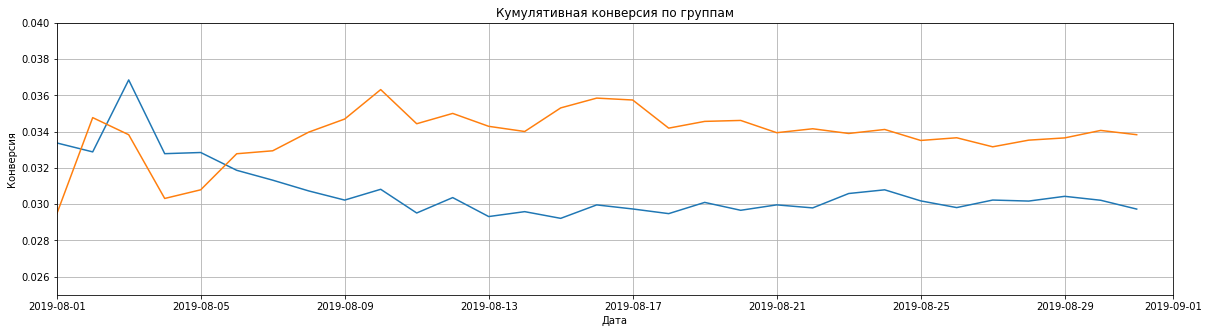

In [52]:
# строим графики
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивную конверсию группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивную конверсию группы B')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])
plt.title('Кумулятивная конверсия по группам')
plt.show()

#### Вывод - до до 4 августа показатели конверсии по группа приерно симетричны и сначало растут до 0,35 и 0,37 после группа А теряет постепенно конверию до уровня примерно 0,3 и остается примерно на таком же уровне на все сроке до 330 августа, по группе В конверсия после 4 августа начинает растивонами с максимумом в 0,365 10 августа и 0,36 17 августа и псоле снижается и остается на уровне 0,34 до 30 августа 19 года

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [53]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [54]:
mergedCumulativeConversions.head(5)

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


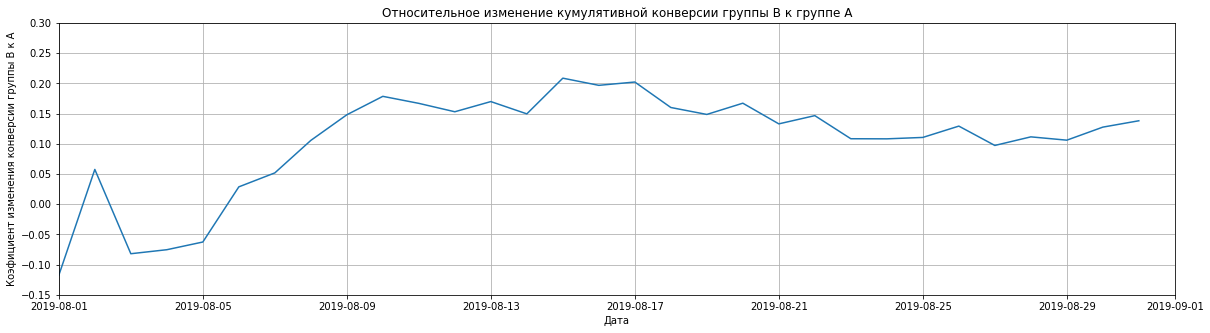

In [55]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.ylabel('Коэфициент изменения конверсии группы В к А')
plt.xlabel('Дата')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.15, 0.3])
plt.show()


#### Вывод  - отношение конверсии группы В к А от 1 августа до 3 виден резкий рост затем спад с -0,1 до 0,05 и спад до -0,05 затем виден постепенный рост до пика 15-16 августа 0,21  и дальше остепенное снижение до 29 августа до 0,11 с последющим ростом

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [56]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [57]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(5))

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


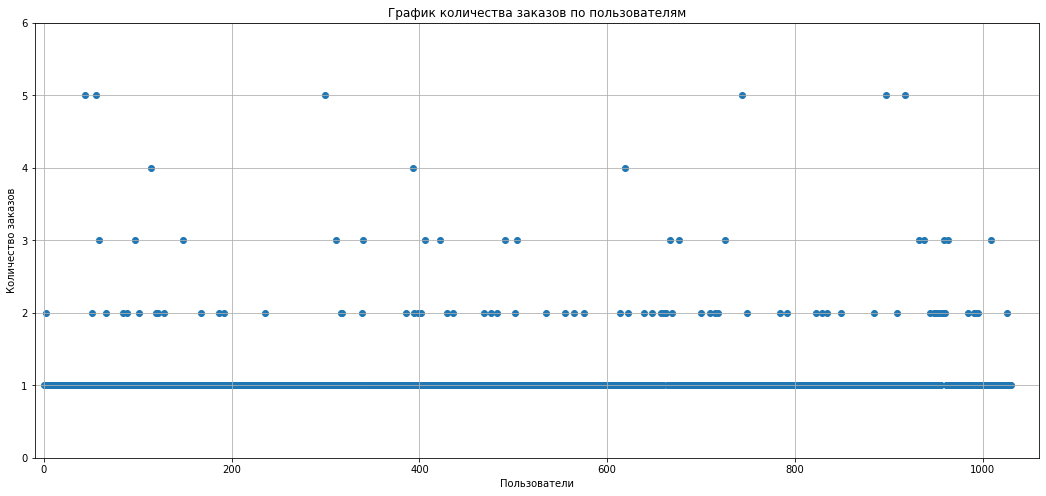

In [58]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(18,8))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')

plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.axis([-10,1060, 0, 6])
plt.show()

#### Вывод - как видно из точечного графика количество заказов в массе своей не превышает 2 х на человека и в основной массе сосредоточено на 1 заказае, 3 и более заказы уже редки

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Определим 90, 95 и 99 перцентили количества закзов в выборке:

In [59]:
display(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

array([1., 2., 4.])

#### Вывод - подсчеты перцентелей дает что, не более 5% от общей массы заказов состовляет -   2а заказа и не более 1% 4а заказа, как верхнюю границу выберу не более 2 заказов для дальнейших расчетов

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [60]:
display(orders.sort_values(by='revenue', ascending=False).head(5))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


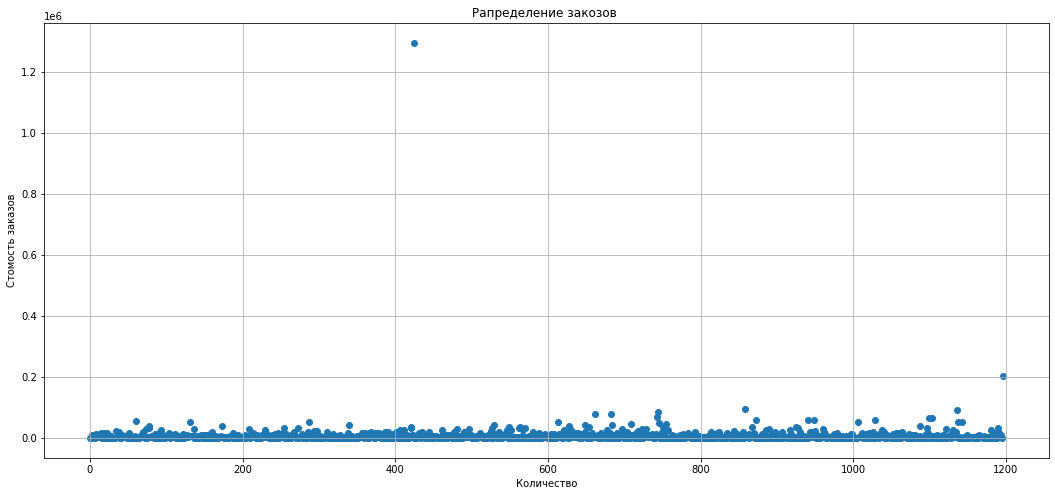

In [61]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(18,8))
plt.grid()
plt.scatter(x_values, orders['revenue']) 
plt.title('Рапределение закозов ')
plt.ylabel('Стомость заказов')
plt.xlabel('Количество')
plt.show()

#### Вывод - общая масса заказов сосредоточена в области до 25000 уе и и не большим количество чуть более 30000 уе.

In [62]:
orders1 = orders.query('revenue<32000')

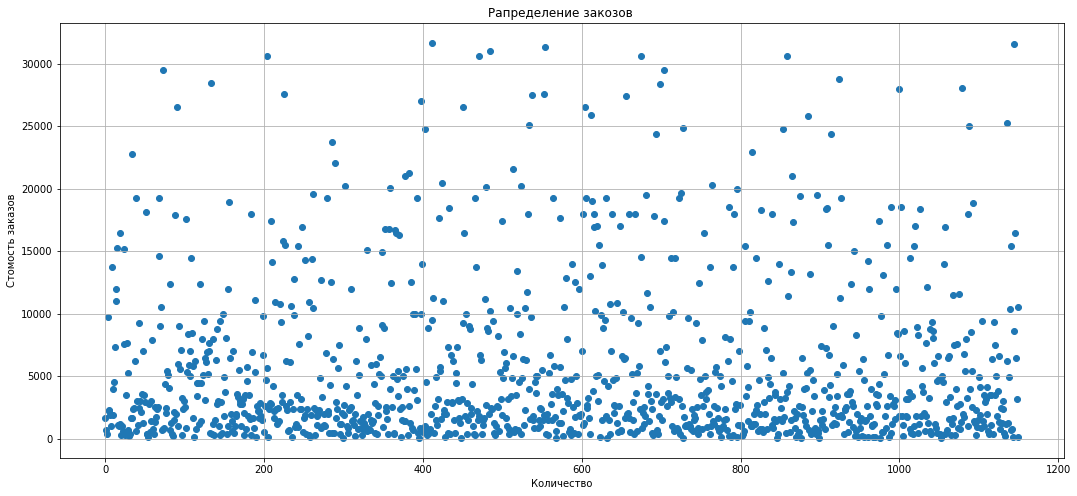

In [63]:
x_values = pd.Series(range(0, len(orders1['revenue'])))
plt.figure(figsize=(18,8))
plt.grid()
plt.scatter(x_values, orders1['revenue']) 
plt.title('Рапределение закозов ')
plt.ylabel('Стомость заказов')
plt.xlabel('Количество')
plt.show()

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

Определим 90, 95 и 99 перцентили количества закзов в выборке:

In [64]:
display(np.percentile(orders['revenue'], [90, 95, 99]))

array([18168. , 28000. , 58233.2])

#### Вывод - подсчеты перцентелей дает что, не более 5% заказов дороже 28000 заказов и не более 1% 58000 . 99% заказов меньше суммы 58236.5 , установим её в качестве границы для аномалий.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Чтобы посчитать статистическую значимость различий в конверсии и среднем чеке применим метод Непараметрический тест Уилкоксона-Манна-Уитни. передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами и конверсии.Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости. 

В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

Для тестирования всех гипотез ниже будем применять критерий Манна-Уитни, так как данные не распределены нормально, и в них присутствуют выбросы.

In [65]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [66]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [84]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visitors'].sum()
                                                                           - len(ordersByUsersA['orders'])),
                                                        name='orders')],
                    axis=0)


In [80]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visitors'].sum()
                                                                           - len(ordersByUsersB['orders'])),
                                                        name='orders')],axis=0)


586

In [69]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


#### Вывод - По «сырым» данным различия конверсий  групп A и B есть, Первое число — p-value = 0.015 меньше 0.05, Значит, нулевую гипотезу о том, что статистически значимых различий по конверсии между группами нет,  отвергаем, разница есть,  относительный выигрыш группы B равен 14% — второе число в выводе.


### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [70]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']
                                                    ['revenue'],
                                                    alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/
                                                            orders[orders['group']=='A']['revenue'].mean()-1))  

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


####  Вывод - По «сырым» данным различий в среднем чеке групп A и B нет, Первое число — p-value = 0.764 больше 0.05, Значит, нулевую гипотезу о том, что статистически значимых различий по среднему чеку между группами нет, не отвергаем,   относительный выигрыш группы B равен 25,7% — второе число в выводе

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [71]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [72]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

In [73]:
revenue_perc_99=np.percentile(orders['revenue'], 99)
order_check = np.percentile(ordersByUsers['orders'], 98)
order_check


3.0

In [74]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_perc_99]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Аномальные пользователи

In [75]:
display(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitor_id, dtype: int64

Всего аномальных пользователей = 20


Удаление аномальных пользователей

In [76]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [77]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18720, dtype: int64

In [78]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.014
Относительный показатель 'B' и 'A' = 0.151


#### Вывод - По «очищенным» данным различия конверсий  групп A и B есть, Первое число — p-value = 0.013 меньше 0.05, Значит, нулевую гипотезу о том, что статистически значимых различий по конверсии между группами нет,  отвергаем, разница есть,  относительный выигрыш группы B равен 15.3% — второе число в выводе, p-value немного уменьшился с 0,016 до 0,013 и выигрыш по группе В уменшился на 8 %

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [79]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

alpha = 0.05
p-value = 0.959
Относительный показатель 'B' и 'A' = -0.014


####  Вывод - По «очищенным» данным различий в среднем чеке групп A и B нет, Первое число — p-value = 0.997 больше 0.05, Значит, нулевую гипотезу о том, что статистически значимых различий по среднему чеку между группами нет, не отвергаем,   относительный прогигрыш группы B равен 16%, по очищенным данным p-value примерно осталься темже и средий просел в группе В

## Общий вывод - Имеющиеся факты:
По «сырым» данным различия конверсий  групп A и B есть, По «очищенным» данным различия конверсий групп A и B есть;
По «сырым» данным различий в среднем чеке групп A и B нет,По «очищенным» данным различий в среднем чеке групп A и B нет,
График Относительное изменение кумулятивной конверсии группы B к группе A показывает постепенный рост, с незначительным спадом вначале
График Относительное изменение кумулятивного среднего чека групп "B" к "А" показывает волнообразные скачки с дальнейшей стабилизацией, по ичищенным данным средний чек ушел вообще в минус но тендеция к увеличению имеется.
Исходя из обнаруженных фактов, тест предлагаю остановить, результат виден уже хоть минимальный но плюс от группы В виден.